In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2
import glob
import os

In [41]:
out_dir = 'img_folder'

filedir = 'E:\OCTA_proj\OCTA\\normal\macula'
files = glob.glob(filedir + '/*.bmp')

for file in files:
    Image.open(file).resize((256,256), Image.LANCZOS).save(os.path.join(out_dir, file.split('\\')[-1][:-4] + '.png'))

In [2]:
inp_dir = 'img_folder\optic_disc'
files = glob.glob(inp_dir + '/*.png')

In [3]:
files[0]

'img_folder\\optic_disc\\DK0001_DK0001__DK0001_19461120_Male_Angiography 6x6 mm_20211105145649_OD_20220128135253_Angiography_Deep.png'

In [4]:
image = cv2.imread(files[0], 0)

In [5]:
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


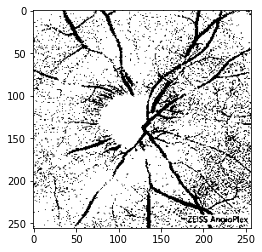

In [6]:
plt.imshow(image_result, cmap=plt.cm.binary)

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(image)

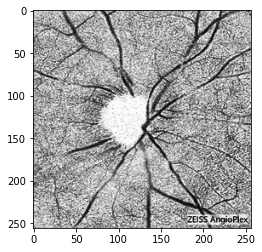

In [18]:
plt.imshow(equalized, cmap=plt.cm.binary)

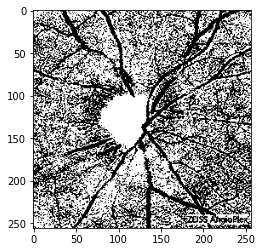

In [35]:
#blur = cv2.GaussianBlur(equalized,(1,1),0)
blur = equalized
th, im_res = cv2.threshold(blur, 0, 255,cv2.THRESH_BINARY +  cv2.THRESH_OTSU)
desired_th = th*0.9
_, th_img = cv2.threshold(blur, desired_th, 255, cv2.THRESH_BINARY)
plt.imshow(th_img, cmap=plt.cm.binary)

In [36]:
im_res = th_img
im_res[im_res==255] = 1
sum(sum(im_res))/(256*256)

0.4582061767578125

In [8]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

In [37]:
# perform skeletonization
skeleton = skeletonize(im_res)

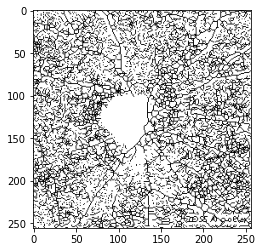

In [38]:
plt.imshow(skeleton, cmap=plt.cm.binary)

In [74]:
(sum(sum(skeleton))/(256*256))*256/6

9.686848958333334

In [59]:
sum(sum(im_res))/(256*256)

0.3891143798828125

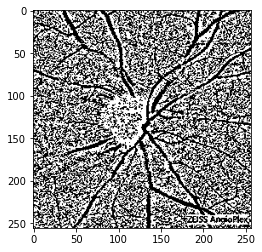

In [24]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(image)
th3 = cv2.adaptiveThreshold(equalized,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY+ cv2.THRESH_BINARY,11,2)
plt.imshow(th3, cmap=plt.cm.binary)

In [28]:

skeleton = skeletonize(th3)

ValueError: Image contains values other than 0 and 1

In [7]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments


# load the image, convert it to grayscale, and blur it
#image=cv2.resize(image,(800,615))
gray = image#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(gray,9,75,75)
median=cv2.medianBlur(blur,5)


cv2.imshow("median",median)

#cv2.imshow()

# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(median, 155, 255, cv2.THRESH_BINARY)[1]
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue

	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)

	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels >300:
		mask = cv2.add(mask, labelMask)

# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
     ellipse = cv2.fitEllipse(c)
     (x, y, w, h) = cv2.boundingRect(c)
     cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
                 cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
     cv2.ellipse(image,ellipse,(0,255,0),2)
          
     print(h)
     print(w)
     print(x)
     print(y)
     break
	# draw the bright spot on the image

cv2.imshow("Image", image)
cv2.waitKey(0)

ValueError: not enough values to unpack (expected 2, got 0)

In [8]:
cnts

[]